In [46]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [47]:
boston_df = pd.read_csv("housing.data.csv", delimiter="\s+")

The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

crim: per capita crime rate by town.

zn: proportion of residential land zoned for lots over 25,000 sq.ft.

indus: proportion of non-retail business acres per town.

chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox: nitrogen oxides concentration (parts per 10 million).

rm: average number of rooms per dwelling.

age: proportion of owner-occupied units built prior to 1940.

dis: weighted mean of distances to five Boston employment centres.

rad: index of accessibility to radial highways.

tax: full-value property-tax rate per \$10,000.

ptratio: pupil-teacher ratio by town.

black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat: lower status of the population (percent).

medv: median value of owner-occupied homes in \$1000s

In [48]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [49]:
# Try to print all data types of dataset
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## 1.Univariate Regression
We will create a model to predict house price (MEDV) using number of rooms (RM)
### 1a. Extract feature we use to predict 
1. using square brackets []
2. using the pandas function .loc, and 
3. using the pandas function .iloc. 

What are the differences?

In [61]:
rm_x = boston_df[['RM']]
medv_y = boston_df['MEDV']
print(medv_y)
print(rm_x.shape)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64
(506, 1)


### 1b. Split dataset into training set and testing set

In [62]:
# create testing and training data for RM variable
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(np.array(rm_x), np.array(medv_y), test_size=0.2)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(404, 1)
(102, 1)
(404,)
(102,)


### 1c. Train model

In [63]:
from sklearn import linear_model
linReg = linear_model.LinearRegression()
linReg.fit(trainX, trainY)

LinearRegression()

### 1d. Evaluate Trained Model
- Use MSE to estimate the error
- Plotting the testing data against the model/hypothesis
- the residual plot, which shows what is the difference in predicted and actual values, across different X values, for the testing data

In [64]:
pred_uniRM_y = linReg.predict(testX)

In [66]:
from sklearn.metrics import mean_squared_error
print('Mean squared error ', mean_squared_error(testY, pred_uniRM_y))

Mean squared error  45.52079561051845


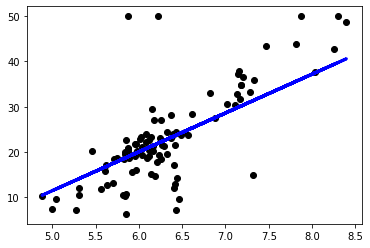

In [67]:
plt.scatter(testX, testY, color='black')
plt.plot(testX, pred_uniRM_y, color='blue', linewidth=3)

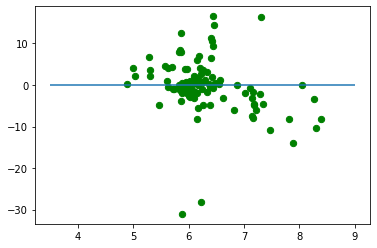

In [68]:
plt.scatter(testX, linReg.predict(testX) - testY, c='g', s=40)
plt.hlines(y=0, xmin=3.5, xmax=9)

**With your dataframe slicing skill, can you count the number of residuals that are larger than zero and those that are smaller than zero?**

**Use the seaborn package to visualise the correlation plot and identify the next potential predictor of the house price. You should identify 'LSTAT' as the next potential predictor. Why is it?**

## 2. Multivariate 
Do the same steps and use the same functions


In [71]:
X = boston_df.drop('MEDV', axis=1)
Y = boston_df[['MEDV']]

In [77]:
from sklearn.model_selection import train_test_split
mtrainX, mtestX, mtrainY, mtestY = train_test_split(np.array(X), np.array(Y), test_size=0.2)
print(mtrainX.shape)
print(mtestX.shape)
print(mtrainY.shape)
print(mtestY.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [78]:
from sklearn import linear_model
linReg = linear_model.LinearRegression()
linReg.fit(mtrainX, mtrainY)


LinearRegression()

In [79]:
pred_y = linReg.predict(mtestX)
print(linReg.intercept_)
print(linReg.coef_)
from sklearn.metrics import mean_squared_error
print('Mean squared error ', mean_squared_error(mtestY, pred_y))

[36.37374109]
[[-1.15031016e-01  4.74619640e-02  1.51651754e-02  3.26688237e+00
  -1.74239958e+01  3.61496600e+00  1.13784028e-02 -1.41232077e+00
   3.08914911e-01 -1.01950453e-02 -9.33458294e-01  9.12506089e-03
  -5.93033533e-01]]
Mean squared error  23.532664503369926


In [ ]:
# Multivariate with feature scaling
